In [1]:
import sys
sys.executable

import torch
import torchvision
import torchvision.transforms as T
import PIL
from PIL import Image

In [4]:
sys.executable

'/home/israel/test_env/bin/python3'

In [2]:
from fscnn2 import FSCNN

In [8]:
# Specify a path
PATH = 'e_0059_vl_19550.4_pa_0.978_iou_0.953.pth'

model = FSCNN(num_classes=2)
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
model.eval()

FSCNN(
  (ds_conv0): _CBNReLU(
    (conv): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (ds_conv1): _DSConv(
    (conv): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (ds_conv2): _DSConv(
    (conv): Sequential(
      (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=48, bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
  

In [ ]:
while (cap.isOpened()):
            ret, image = cap.read()
            try:
                image = cv2.resize(image,
                                   (net_config.common.input_width, net_config.common.input_height))
            except Exception as e:
                print(str(e))
                break
            image_pil = Image.fromarray(image)
            if net_config.common.color_space == "YCbCr":
                image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
            else:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            image = input_transform(image)
            image = image.cuda()
            image = image.unsqueeze(0)
            outputs = network(image)
            # pred_np = outputs.squeeze().cpu().numpy()
            # pred_norm = 256 * (pred_np[1] - np.min(pred_np[1])) / np.ptp(pred_np[1]).astype(int)
            predictions = outputs.data.max(1)[1].squeeze_(1).cpu().numpy()

In [30]:
im_path  = 'images/000012_yuv_1.png'

img = Image.open(im_path)
ycbcr = img.convert('YCbCr')
transform = T.Compose([T.ToTensor()])
img = transform(ycbcr)
img = img.unsqueeze(0)
pred = model(img)

In [31]:
predictions = pred.data.max(1)[1].squeeze_(1).cpu().numpy()

In [32]:
img.numpy().shape

(1, 3, 480, 720)

In [33]:
import matplotlib.pyplot as plt

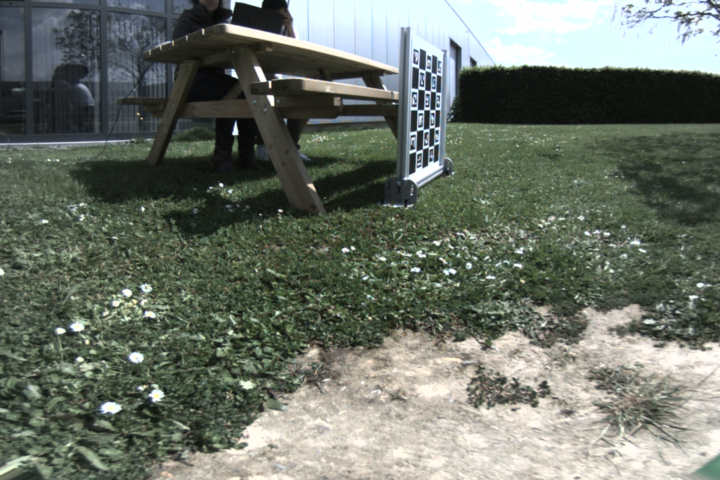

In [34]:
img = Image.open(im_path)
img

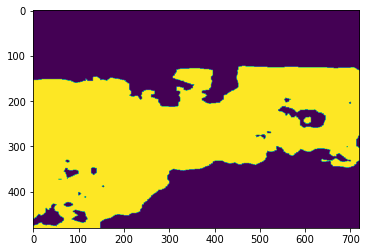

In [35]:
plt.show()
plt.imshow(predictions[0])
plt.show()

## Save and Load test

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
im_path  = 'images/000006_yuv_1.png'
img = Image.open(im_path)
transform = T.Compose([T.ToTensor()])
img = transform(img)
pred = net(img)